Please enter the path to your CSV file: /content/sample_data/advertising.csv

Data Preview:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


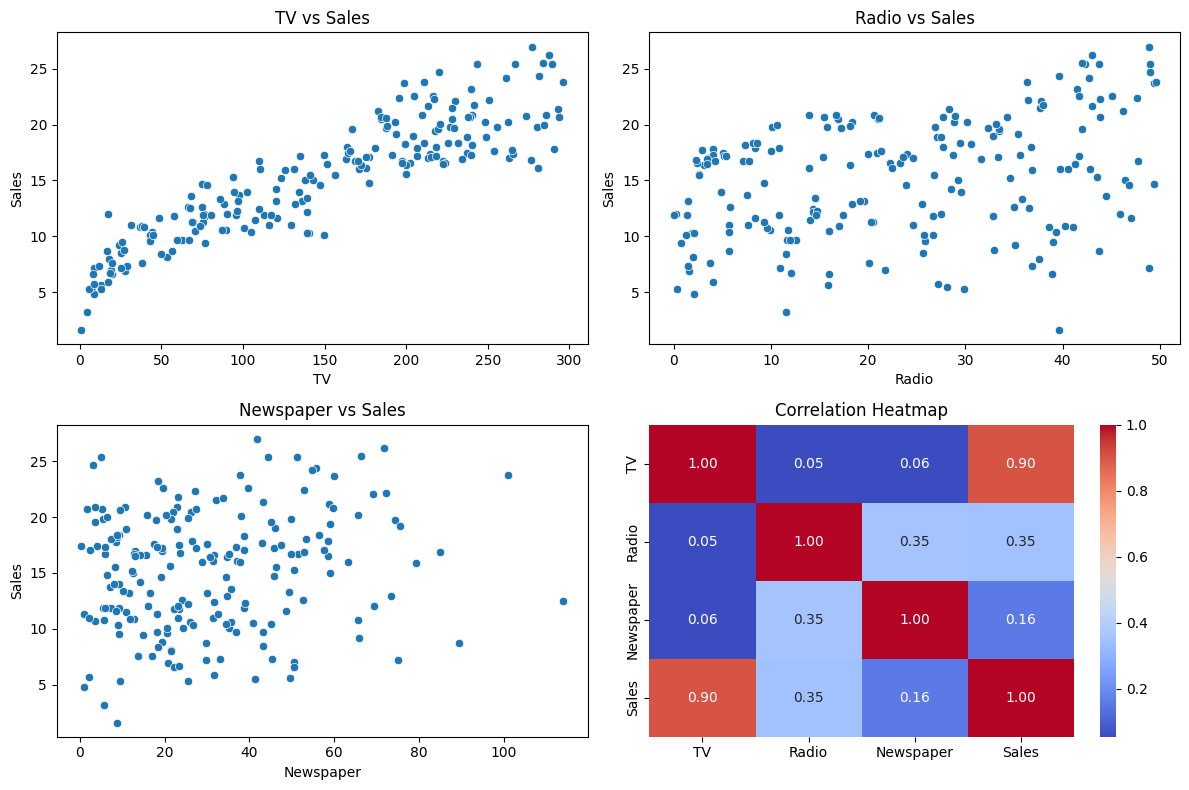


Model Evaluation:
Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared: 0.91


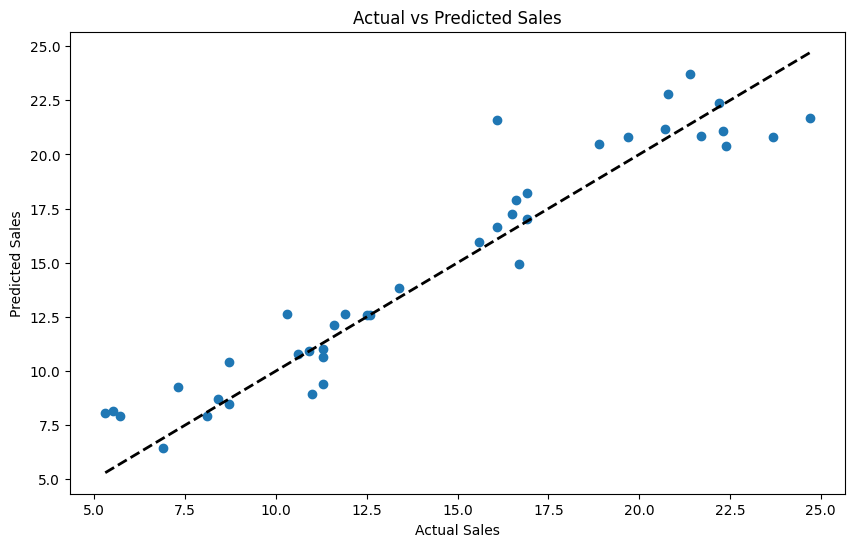


Feature Coefficients:
            Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ask the user to upload the CSV file
file_path = input("Please enter the path to your CSV file: ")

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("\nData Preview:\n", data.head())

# Check if there are any missing values
print("\nMissing Values:\n", data.isnull().sum())

# Visualize the relationship between advertising spending and sales
plt.figure(figsize=(12, 8))

# Scatter plot for TV vs Sales
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='TV', y='Sales')
plt.title('TV vs Sales')

# Scatter plot for Radio vs Sales
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='Radio', y='Sales')
plt.title('Radio vs Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='Newspaper', y='Sales')
plt.title('Newspaper vs Sales')

# Correlation heatmap
plt.subplot(2, 2, 4)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Prepare the features and target variable
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Show the coefficients (importance of each feature)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:\n", coefficients)
